### EXTRACCIÓN DE DATOS

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "./data/emotions.csv"

emotions = pd.read_csv(url)

#fuente kaggle: https://www.kaggle.com/datasets/yash9439/emotify-emotion-classificaiton-in-songs/data
emotions

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,400,pop,1,1,0,0,0,0,1,0,0,3,0,0,26,1,Russian
8403,400,pop,0,0,0,1,0,0,1,0,1,3,0,1,29,0,Russian
8404,400,pop,0,0,0,0,0,0,0,1,0,4,0,1,34,1,Polish
8405,400,pop,1,0,0,0,0,0,1,1,0,5,0,0,39,1,French


### EXPLORATORY DATA ANALYSIS (EDA):

In [13]:
emotions.info()

"""
La gran mayoria contienen integers, del 0 al 1, o del 1 al 5 como es el caso de mood
No hay valores nulos o vacios
"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407 entries, 0 to 8406
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track id            8407 non-null   int64 
 1    genre              8407 non-null   object
 2    amazement          8407 non-null   int64 
 3    solemnity          8407 non-null   int64 
 4    tenderness         8407 non-null   int64 
 5    nostalgia          8407 non-null   int64 
 6    calmness           8407 non-null   int64 
 7    power              8407 non-null   int64 
 8    joyful_activation  8407 non-null   int64 
 9    tension            8407 non-null   int64 
 10   sadness            8407 non-null   int64 
 11   mood               8407 non-null   int64 
 12   liked              8407 non-null   int64 
 13   disliked           8407 non-null   int64 
 14   age                8407 non-null   int64 
 15   gender             8407 non-null   int64 
 16   mother tongue      8407

'la gran mayoria contienen integers, del 0 al 1, o del 1 al 5 como es el caso de mood'

In [15]:
emotions.dtypes

track id               int64
 genre                object
 amazement             int64
 solemnity             int64
 tenderness            int64
 nostalgia             int64
 calmness              int64
 power                 int64
 joyful_activation     int64
 tension               int64
 sadness               int64
 mood                  int64
 liked                 int64
 disliked              int64
 age                   int64
 gender                int64
 mother tongue        object
dtype: object

In [16]:
emotions.describe()

,track id,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender
count,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000
mean,171.121565,0.133103,0.198882,0.184489,0.258237,0.304627,0.182110,0.255145,0.224813,0.183656,3.493874,0.391459,0.208993,31.850601,0.456167
std,116.888669,0.339707,0.399183,0.387906,0.437691,0.460277,0.385958,0.435968,0.417484,0.387227,0.991124,0.488106,0.406613,12.457801,0.498105
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,23.000000,0.000000
50%,164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,28.000000,0.000000
75%,278.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,37.000000,1.000000
max,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,99.000000,1.000000


In [116]:
emotions.columns


Index(['trackid', 'genre', 'amazement', 'solemnity', 'tenderness', 'nostalgia',
       'calmness', 'power', 'joyful_activation', 'tension', 'sadness', 'mood',
       'liked', 'disliked', 'age', 'gender', 'mothertongue'],
      dtype='object')

In [117]:
"""Muchas de las columnas tienen un espacio delante, lo elimino""";

In [29]:
emotions.columns = emotions.columns.str.replace(" ","")

emotions.columns

Index(['trackid', 'genre', 'amazement', 'solemnity', 'tenderness', 'nostalgia',
       'calmness', 'power', 'joyful_activation', 'tension', 'sadness', 'mood',
       'liked', 'disliked', 'age', 'gender', 'mothertongue'],
      dtype='object')

In [30]:
emotions["genre"].unique()

array(['classical', 'rock', 'electronic', 'pop'], dtype=object)

In [31]:
emotions["genre"].nunique()

4

In [32]:
emotions['genre'].value_counts()

genre
classical     2688
rock          2038
pop           1855
electronic    1826
Name: count, dtype: int64

In [14]:
emotions["trackid"].value_counts()

trackid
207    59
213    58
211    58
313    57
215    57
       ..
386    11
334    11
332    11
337    11
346    11
Name: count, Length: 400, dtype: int64

In [15]:
#de los 4 géneros del estudio, la musica clasica fue escuchado por el mayor numero de participantes(2688 de un total de 8407 personas), seguido del rock, pop y la electronica

In [35]:
emotions.groupby("genre")["trackid"].count().sort_values(ascending=False)

genre
classical     2688
rock          2038
pop           1855
electronic    1826
Name: trackid, dtype: int64

In [36]:
#quiero ver cuantos tracksid hay por cada genero
#con esto puedo ver cuantas veces sale la pista 1 por ejemplo

contador_trackid = emotions["trackid"].value_counts().get(1,0)
contador_trackid

np.int64(48)

In [37]:
#hay 100 trackid de cada uno de los 4 generos, haciendo un total de 400
classical = emotions[emotions["genre"] == "classical"]
classical

,trackid,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mothertongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,100,classical,0,0,0,0,0,1,0,1,0,3,1,0,30,0,Dutch
2684,100,classical,0,1,0,0,0,0,0,1,1,1,1,0,33,0,Russian
2685,100,classical,0,0,0,0,0,1,0,0,1,4,1,0,23,1,English
2686,100,classical,1,1,0,0,0,1,0,0,0,3,0,0,22,0,Malay


In [38]:
classical.nunique()

trackid              100
genre                  1
amazement              2
solemnity              2
tenderness             2
nostalgia              2
calmness               2
power                  2
joyful_activation      2
tension                2
sadness                2
mood                   5
liked                  2
disliked               2
age                   61
gender                 2
mothertongue          35
dtype: int64

In [39]:
pop = emotions[emotions["genre"] == "pop"]
pop

,trackid,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mothertongue
6552,301,pop,1,0,0,0,1,0,1,0,0,3,1,0,16,0,English
6553,301,pop,0,0,1,0,1,0,1,0,0,3,1,0,22,0,Spanish
6554,301,pop,0,0,0,0,1,0,0,0,0,5,0,0,20,0,English
6555,301,pop,0,0,1,0,0,0,0,0,0,5,0,1,23,1,English
6556,301,pop,0,1,0,1,0,0,0,1,0,3,0,1,37,0,Dutch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,400,pop,1,1,0,0,0,0,1,0,0,3,0,0,26,1,Russian
8403,400,pop,0,0,0,1,0,0,1,0,1,3,0,1,29,0,Russian
8404,400,pop,0,0,0,0,0,0,0,1,0,4,0,1,34,1,Polish
8405,400,pop,1,0,0,0,0,0,1,1,0,5,0,0,39,1,French


In [40]:
pop.value_counts()

trackid  genre  amazement  solemnity  tenderness  nostalgia  calmness  power  joyful_activation  tension  sadness  mood  liked  disliked  age  gender  mothertongue
370      pop    0          0          0           1          0         0      0                  0        1        5     0      0         23   1       Russian         21
328      pop    0          0          0           0          0         0      1                  0        0        4     0      0         47   1       English          5
400      pop    0          0          0           0          0         0      0                  1        0        3     0      0         18   1       Dutch            2
306      pop    0          0          0           1          0         0      0                  0        0        4     1      0         25   0       Russian          2
301      pop    1          0          0           1          0         0      0                  0        0        3     0      0         46   1       Dutch

In [41]:
pop.nunique()

trackid              100
genre                  1
amazement              2
solemnity              2
tenderness             2
nostalgia              2
calmness               2
power                  2
joyful_activation      2
tension                2
sadness                2
mood                   5
liked                  2
disliked               2
age                   56
gender                 2
mothertongue          33
dtype: int64

In [42]:
rock = emotions[emotions["genre"] == "rock"]
rock

,trackid,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mothertongue
2688,101,rock,0,1,0,0,1,0,0,0,0,2,0,1,15,1,English
2689,101,rock,0,0,0,0,0,1,0,1,0,3,0,1,26,0,English
2690,101,rock,0,0,0,0,0,1,0,0,1,5,0,1,40,0,English
2691,101,rock,0,1,1,0,1,0,0,0,0,5,1,0,20,0,English
2692,101,rock,0,0,0,0,0,0,0,1,0,4,0,1,26,0,Russian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,200,rock,0,0,1,0,0,0,0,0,0,2,0,0,29,0,English
4722,200,rock,0,0,0,1,0,0,1,0,0,3,1,0,37,1,Chinese
4723,200,rock,0,0,1,0,0,0,0,0,0,4,1,0,51,0,English
4724,200,rock,0,0,1,0,0,0,0,0,0,5,0,0,30,1,Russian


In [45]:
electronic = emotions[emotions["genre"] == "electronic"]
electronic

,trackid,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mothertongue
4726,201,electronic,0,0,0,0,1,0,1,0,1,4,1,1,42,0,English
4727,201,electronic,0,1,0,0,0,0,1,1,0,2,0,1,25,1,Russian
4728,201,electronic,1,0,0,0,0,1,1,0,0,5,0,0,20,0,English
4729,201,electronic,0,0,0,0,0,0,0,1,0,3,0,1,16,0,English
4730,201,electronic,0,0,0,0,0,0,0,1,0,3,0,1,21,0,Dutch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,300,electronic,0,0,0,0,0,0,0,1,0,3,0,1,25,1,Russian
6548,300,electronic,0,0,0,0,0,0,1,0,0,3,0,1,50,1,English
6549,300,electronic,0,0,0,0,0,1,0,1,0,1,0,0,26,1,Russian
6550,300,electronic,0,0,0,0,0,1,0,0,0,4,0,0,34,0,English


In [46]:
len(electronic)

1826

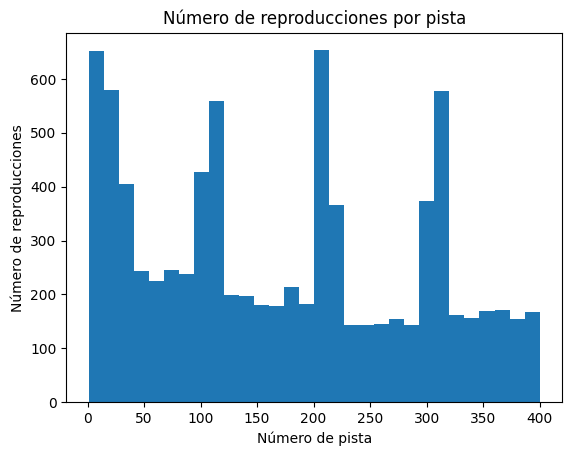

In [48]:
plt.hist(emotions["trackid"], bins = 30)
plt.title("Número de reproducciones por pista")
plt.xlabel("Número de pista")
plt.ylabel("Número de reproducciones");

"""aqui se ve que las primeras pistas de cada género siempre fueron las más reproducidas"""


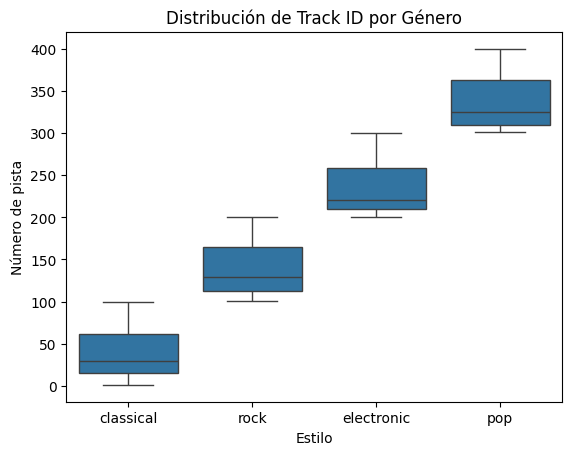

In [50]:
"""
esta visualizacion no tiene mucho sentido
"""
sns.boxplot(data=emotions, x='genre', y='trackid') 
plt.title('Distribución de Track ID por Género')
plt.xlabel("Estilo")
plt.ylabel("Número de pista");

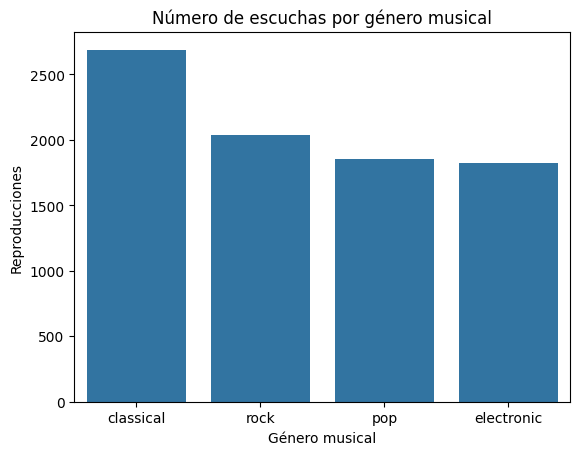

In [53]:
sns.countplot(data = emotions,
              x = "genre",
              order = emotions["genre"].value_counts().index)
plt.title("Número de escuchas por género musical")
plt.xlabel("Género musical")
plt.ylabel("Reproducciones");

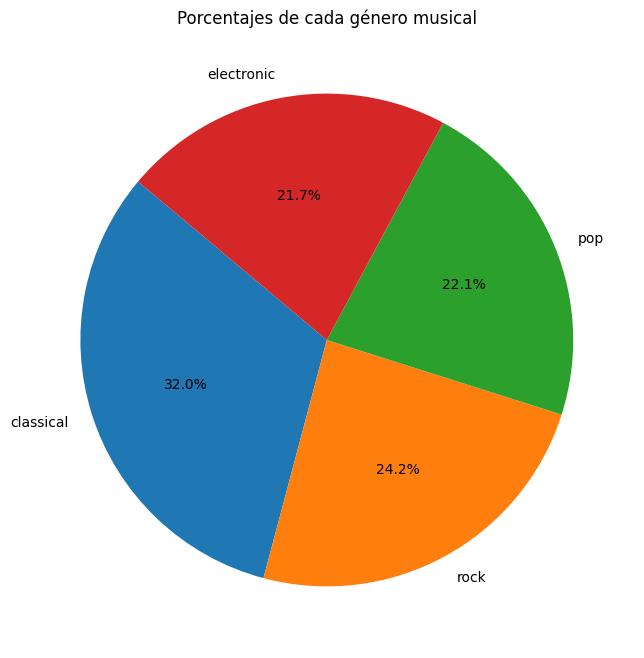

In [52]:
emotions['genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8));
plt.title("Porcentajes de cada género musical")
plt.ylabel("");

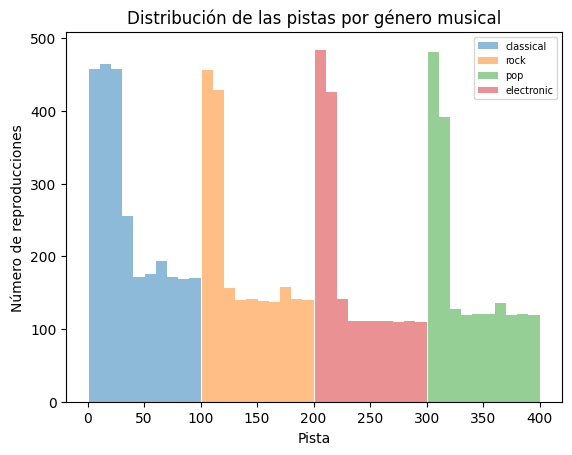

In [55]:
genres = ['classical', 'rock', 'pop', 'electronic']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for genre, color in zip(genres, colors):
    subset = emotions[emotions['genre'] == genre]
    plt.hist(subset['trackid'], alpha=0.5, label=genre, color = color)

plt.legend(loc='upper right', prop = {"size": 7})
plt.title('Distribución de las pistas por género musical')
plt.xlabel('Pista')
plt.ylabel('Número de reproducciones');


In [57]:
#dataframe solo con el género musical electronico

electronic_df = emotions[emotions["genre"] == "electronic"]
electronic_df

,trackid,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mothertongue
4726,201,electronic,0,0,0,0,1,0,1,0,1,4,1,1,42,0,English
4727,201,electronic,0,1,0,0,0,0,1,1,0,2,0,1,25,1,Russian
4728,201,electronic,1,0,0,0,0,1,1,0,0,5,0,0,20,0,English
4729,201,electronic,0,0,0,0,0,0,0,1,0,3,0,1,16,0,English
4730,201,electronic,0,0,0,0,0,0,0,1,0,3,0,1,21,0,Dutch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,300,electronic,0,0,0,0,0,0,0,1,0,3,0,1,25,1,Russian
6548,300,electronic,0,0,0,0,0,0,1,0,0,3,0,1,50,1,English
6549,300,electronic,0,0,0,0,0,1,0,1,0,1,0,0,26,1,Russian
6550,300,electronic,0,0,0,0,0,1,0,0,0,4,0,0,34,0,English


In [58]:
#y ahora con las diferentes columnas de las emociones
columns_emotions = ["amazement", "solemnity", "tenderness", "nostalgia", "calmness", "power", "joyful_activation", "tension", "sadness", "mood"]
electronic_df[columns_emotions]

,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood
4726,0,0,0,0,1,0,1,0,1,4
4727,0,1,0,0,0,0,1,1,0,2
4728,1,0,0,0,0,1,1,0,0,5
4729,0,0,0,0,0,0,0,1,0,3
4730,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
6547,0,0,0,0,0,0,0,1,0,3
6548,0,0,0,0,0,0,1,0,0,3
6549,0,0,0,0,0,1,0,1,0,1
6550,0,0,0,0,0,1,0,0,0,4


In [59]:
#de esta manera cuento la de veces que se ha votado por la emocion amazement en las pistas de electronica
electronic_df["amazement"].sum()

np.int64(224)

In [60]:
#numero de no votos o votos 0 por "amazement"
total_zeros = (electronic_df["amazement"] == 0).sum()
total_zeros

np.int64(1602)

In [61]:
#numero de votos para cada emoción, me doy cuenta por los numeros que para reproduccion/persona ha podido poner mas de una emocion
columns_emotions = ["amazement", "solemnity", "tenderness", "nostalgia", "calmness", "power", "joyful_activation", "tension", "sadness", "mood"]
electronic_df[columns_emotions].sum()

amazement             224
solemnity             425
tenderness            132
nostalgia             238
calmness              509
power                 459
joyful_activation     516
tension               693
sadness               209
mood                 6376
dtype: int64

In [62]:
"""
arriba veiamos que que 'mood' tenia un numero muy alto, esto es porque no toma valores 0 y 1, sino que va en un rango del 1 al 5,
entendiendo 5 como el valor maximo y 1 como el minimo (para la electronica)
"""
electronic_df["mood"].value_counts(ascending=False)


mood
4    774
3    568
5    231
2    168
1     85
Name: count, dtype: int64

In [63]:
""" quitamos mood """
columns_emotions = ["amazement", "solemnity", "tenderness", "nostalgia", "calmness", "power", "joyful_activation", "tension", "sadness"]
columns_emotions

['amazement',
 'solemnity',
 'tenderness',
 'nostalgia',
 'calmness',
 'power',
 'joyful_activation',
 'tension',
 'sadness']

In [64]:
electronic_emotions = electronic_df[columns_emotions].sum()

In [65]:
electronic_emotions.idxmax()

'tension'

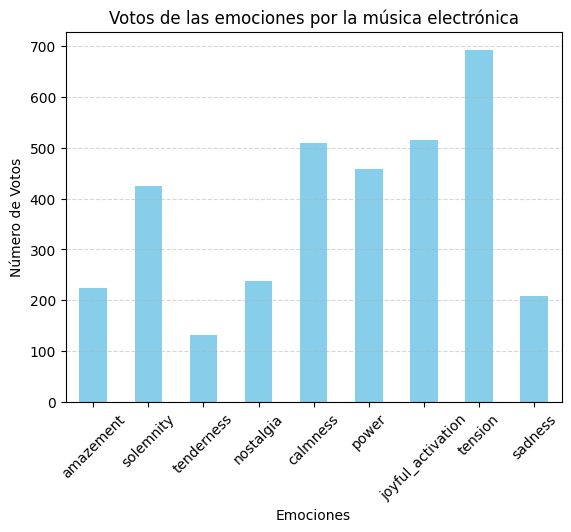

In [118]:
electronic_emotions.plot(kind = "bar", color = "skyblue")
plt.title("Votos de las emociones por la música electrónica")
plt.xlabel("Emociones")
plt.ylabel("Número de Votos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5);

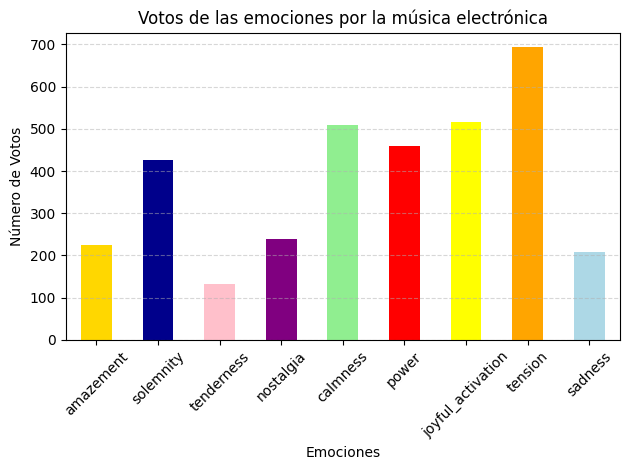

In [119]:
# Asigno el color que mejor creo que le pueda ir a cada emoción
colors = ["gold", "darkblue", "pink", "purple", "lightgreen", "red", "yellow", "orange", "lightblue"]

ax = electronic_emotions.plot(kind="bar", color=colors, legend=False)
ax.set_title("Votos de las emociones por la música electrónica")
ax.set_xlabel("Emociones")
ax.set_ylabel('Número de Votos')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()


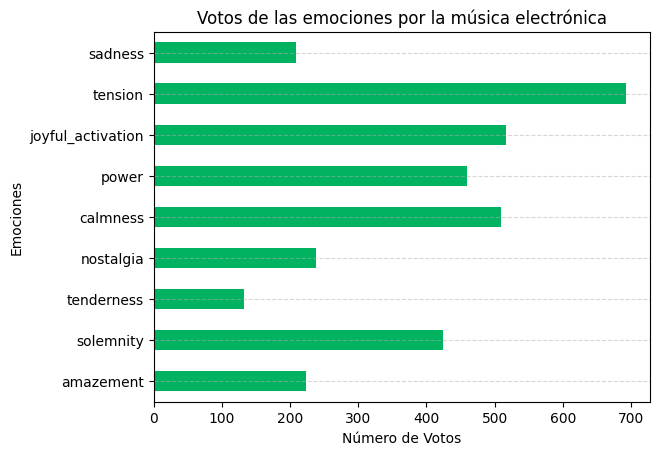

In [50]:
"""
electronic_emotions.plot(kind = "barh", color = "#01b261")
plt.title("Votos de las emociones por la música electrónica")
plt.ylabel("Emociones")
plt.xlabel("Número de Votos")
plt.grid(axis="y", linestyle="--", alpha=0.5);
"""


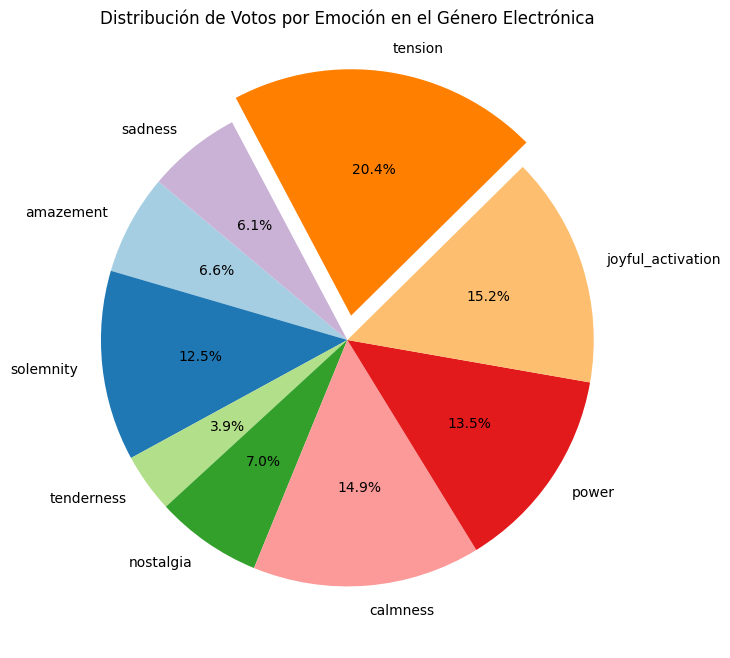

In [120]:
electronic_emotions.plot.pie(autopct="%1.1f%%", startangle=140, figsize=(8, 8), colors=plt.cm.Paired.colors, explode = (0,0,0,0,0,0,0,0.1,0))
plt.title("Distribución de Votos por Emoción en el Género Electrónica")
plt.ylabel(" ")
plt.show()

In [121]:
columns_emotions = ["amazement", "solemnity", "tenderness", "nostalgia", "calmness", "power", "joyful_activation", "tension", "sadness"]

pop_df = emotions[emotions["genre"] == "pop"]
rock_df = emotions[emotions["genre"] == "rock"]
classical_df = emotions[emotions["genre"] == "classical"]

In [122]:
pop_emotions = pop_df[columns_emotions].sum()
rock_emotions = rock_df[columns_emotions].sum()
classical_emotions = classical_df[columns_emotions].sum()


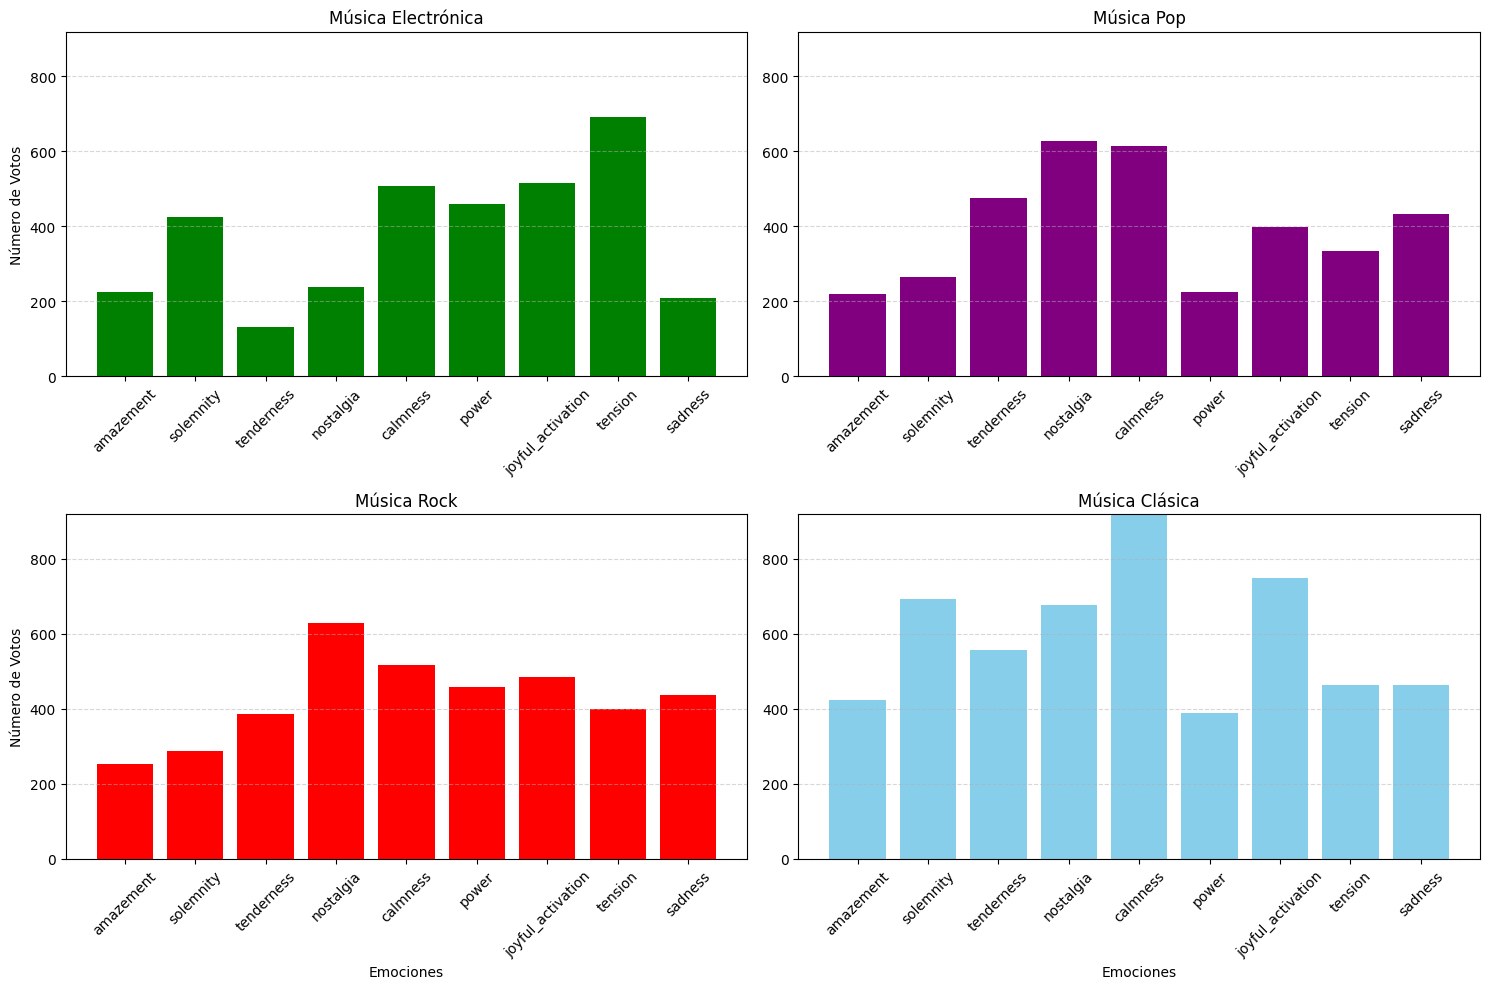

In [123]:
#Ajustamos el valor máximo del eje Y para que salgan los mismos valores en las 4
y_max = max(electronic_emotions.max(), pop_emotions.max(), rock_emotions.max(), classical_emotions.max())

fig, axs = plt.subplots (2,2, figsize=(15,10))
axs[0, 0].bar(electronic_emotions.index, electronic_emotions.values, color="green") 
axs[0, 0].set_title("Música Electrónica") 
#axs[0, 0].set_xlabel('Emociones') 
axs[0, 0].set_ylabel("Número de Votos") 
axs[0,0].set_ylim(0, y_max)
axs[0, 0].tick_params(axis="x", rotation=45) 
axs[0, 0].grid(axis="y", linestyle="--", alpha=0.5)

axs[0, 1].bar(pop_emotions.index, pop_emotions.values, color="purple") 
axs[0, 1].set_title("Música Pop") 
#axs[0, 1].set_xlabel("Emociones") 
#axs[0, 1].set_ylabel("Número de Votos") 
axs[0,1].set_ylim(0, y_max)
axs[0, 1].tick_params(axis="x", rotation=45) 
axs[0, 1].grid(axis="y", linestyle="--", alpha=0.5)

axs[1, 0].bar(rock_emotions.index, rock_emotions.values, color="red") 
axs[1, 0].set_title("Música Rock") 
axs[1, 0].set_xlabel("Emociones") 
axs[1, 0].set_ylabel("Número de Votos") 
axs[1,0].set_ylim(0, y_max)
axs[1, 0].tick_params(axis="x", rotation=45) 
axs[1, 0].grid(axis="y", linestyle="--", alpha=0.5)

axs[1, 1].bar(classical_emotions.index, classical_emotions.values, color="skyblue") 
axs[1, 1].set_title("Música Clásica") 
axs[1, 1].set_xlabel("Emociones") 
#axs[1, 1].set_ylabel('Número de Votos') 
axs[1,1].set_ylim(0, y_max)
axs[1, 1].tick_params(axis="x", rotation=45) 
axs[1, 1].grid(axis="y", linestyle="--", alpha=0.5)

y_max = max(electronic_emotions.max(), pop_emotions.max(), rock_emotions.max(), classical_emotions.max())

plt.tight_layout()

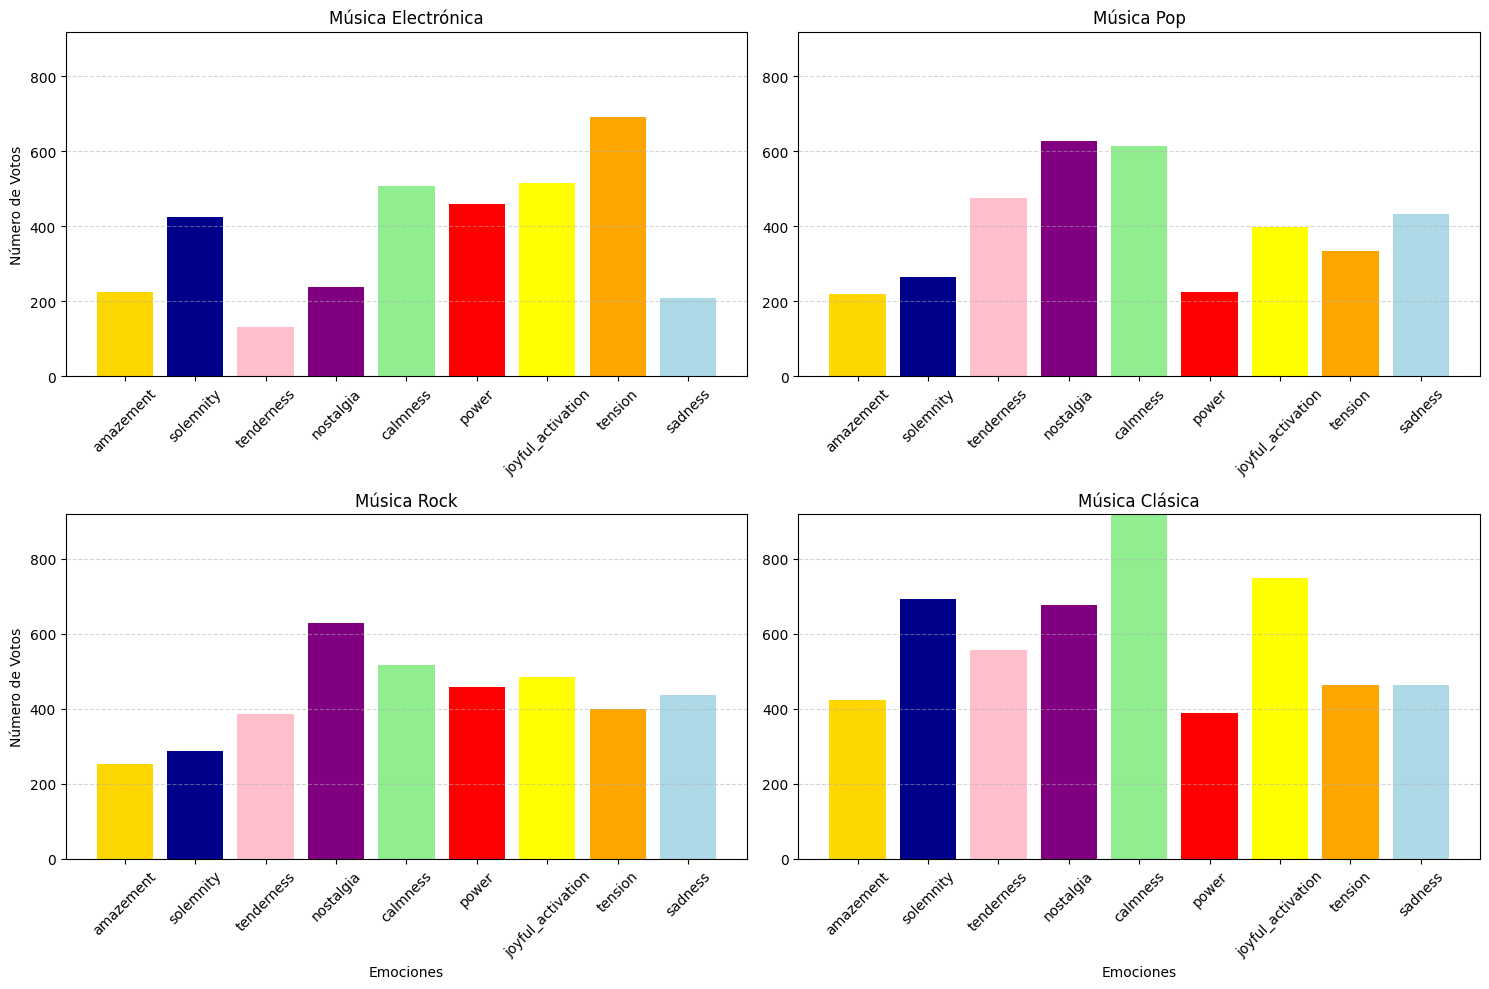

In [124]:
# Creamos dos listas, una con las emociones y otra con la asignación de colores para hacer una mayor distinción y que sea más visible

emotions_list = ["amazement", "solemnity", "tenderness", "nostalgia", "calmness", "power", "joyful_activation", "tension", "sadness"]
colors = ["gold", "darkblue", "pink", "purple", "lightgreen", "red", "yellow", "orange", "lightblue"]

# Diccionario que agrupe emociones y colores
emotion_colors = dict(zip(emotions_list, colors))

# Asignación de los colores a los datos
electronic_colors = [emotion_colors[emotion] for emotion in electronic_emotions.index]
pop_colors = [emotion_colors[emotion] for emotion in pop_emotions.index]
rock_colors = [emotion_colors[emotion] for emotion in rock_emotions.index]
classical_colors = [emotion_colors[emotion] for emotion in classical_emotions.index]

y_max = max(electronic_emotions.max(), pop_emotions.max(), rock_emotions.max(), classical_emotions.max())

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].bar(electronic_emotions.index, electronic_emotions.values, color=electronic_colors) 
axs[0, 0].set_title("Música Electrónica") 
axs[0, 0].set_ylabel("Número de Votos") 
axs[0, 0].set_ylim(0, y_max)
axs[0, 0].tick_params(axis="x", rotation=45) 
axs[0, 0].grid(axis="y", linestyle="--", alpha=0.5)

axs[0, 1].bar(pop_emotions.index, pop_emotions.values, color=pop_colors) 
axs[0, 1].set_title("Música Pop") 
axs[0, 1].set_ylim(0, y_max)
axs[0, 1].tick_params(axis="x", rotation=45) 
axs[0, 1].grid(axis="y", linestyle="--", alpha=0.5)

axs[1, 0].bar(rock_emotions.index, rock_emotions.values, color=rock_colors) 
axs[1, 0].set_title("Música Rock") 
axs[1, 0].set_xlabel("Emociones") 
axs[1, 0].set_ylabel("Número de Votos") 
axs[1, 0].set_ylim(0, y_max)
axs[1, 0].tick_params(axis="x", rotation=45) 
axs[1, 0].grid(axis="y", linestyle="--", alpha=0.5)

axs[1, 1].bar(classical_emotions.index, classical_emotions.values, color=classical_colors) 
axs[1, 1].set_title("Música Clásica") 
axs[1, 1].set_xlabel("Emociones") 
axs[1, 1].set_ylim(0, y_max)
axs[1, 1].tick_params(axis="x", rotation=45) 
axs[1, 1].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()


In [ ]:
"""
ajustar los valores del eje Y para que todos tengan los mismos valores y ver que máximo poner
ya que en el eje de musica clásica el valor de calma sobrepasa los 800
"""

"""podriamos sacar estadisticos de los numeros de votos segun la emocion despertada para cada genero"""

In [91]:
electronic_stats = electronic_emotions.describe()
electronic_stats

count      9.000000
mean     378.333333
std      185.940851
min      132.000000
25%      224.000000
50%      425.000000
75%      509.000000
max      693.000000
dtype: float64

In [92]:
classical_stats = classical_emotions.describe()
classical_stats

count      9.000000
mean     592.666667
std      177.771623
min      388.000000
25%      464.000000
50%      558.000000
75%      694.000000
max      919.000000
dtype: float64

In [93]:
rock_stats = rock_emotions.describe()
rock_stats

count      9.000000
mean     428.111111
std      115.042866
min      253.000000
25%      385.000000
50%      437.000000
75%      484.000000
max      630.000000
dtype: float64

In [94]:
pop_stats = pop_emotions.describe()
pop_stats

count      9.000000
mean     399.111111
std      154.288240
min      219.000000
25%      265.000000
50%      397.000000
75%      476.000000
max      627.000000
dtype: float64

In [ ]:
#columns_emotions
#genres = ["classical", "rock", "electronic", "pop"]

In [95]:
#genre_stats = {}

#for genre in genres:
#    genre_df = emotions[emotions["genre"] == genre][columns_emotions]
#    stats = genre_df.describe()

#    genre_stats[genre] = stats

#combined_stats = pd.concat(genre_stats, axis = 1)

#combined_stats

classical                                                      \
         amazement    solemnity   tenderness    nostalgia     calmness   
count  2688.000000  2688.000000  2688.000000  2688.000000  2688.000000   
mean      0.157366     0.258185     0.207589     0.251488     0.341890   
std       0.364213     0.437717     0.405656     0.433949     0.474431   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                                                                       rock  \
             power joyful_activation      tension      sadness    amazement   
count  2688.000000       2688.000000  2688.000000  2688.000000  2038.000000   
mean      0.144345          0.278274     0.172619     0.172619     0.124141   
std       0.351505          0.448232     0.377988     0.377988     0.329824   
min       0.000000          0.000000     0.000000     0.000000     0.000000   
25%       0.000000          0.000000     0.000000     0.000000     0.000000   
50%       0.000000          0.000000     0.000000     0.000000     0.000000   
75%       0.000000          1.000000     0.000000     0.000000     0.000000   
max       1.000000          1.000000     1.000000     1.000000     1.000000   

       ...   electronic          pop                                         \
       ...      sadness    amazement    solemnity   tenderness    nostalgia   
count  ...  1826.000000  1855.000000  1855.000000  1855.000000  1855.000000   
mean   ...     0.114458     0.118059     0.142857     0.256604     0.338005   
std    ...     0.318454     0.322765     0.350021     0.436877     0.473158   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...     0.000000     0.000000     0.000000     1.000000     1.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

                                                                             
          calmness        power joyful_activation      tension      sadness  
count  1855.000000  1855.000000       1855.000000  1855.000000  1855.000000  
mean      0.331536     0.121833          0.214016     0.179515     0.233962  
std       0.470892     0.327181          0.410249     0.383886     0.423463  
min       0.000000     0.000000          0.000000     0.000000     0.000000  
25%       0.000000     0.000000          0.000000     0.000000     0.000000  
50%       0.000000     0.000000          0.000000     0.000000     0.000000  
75%       1.000000     0.000000          0.000000     0.000000     0.000000  
max       1.000000     1.000000          1.000000     1.000000     1.000000  

[8 rows x 36 columns]

In [125]:
# Calcular estadísticas descriptivas para cada género
classical_stats = classical_emotions[columns_emotions].describe()
rock_stats = rock_emotions[columns_emotions].describe()
electronic_stats = electronic_emotions[columns_emotions].describe()
pop_stats = pop_emotions[columns_emotions].describe()

# Combinar las estadísticas en un solo dataframe
stats_combined = pd.concat({
    "classical": classical_stats,
    "rock": rock_stats,
    "electronic": electronic_stats,
    "pop": pop_stats
}, axis=1)

# Mostrar el dataframe combinado
stats_combined


,classical,rock,electronic,pop
count,9.000000,9.000000,9.000000,9.000000
mean,592.666667,428.111111,378.333333,399.111111
std,177.771623,115.042866,185.940851,154.288240
min,388.000000,253.000000,132.000000,219.000000
25%,464.000000,385.000000,224.000000,265.000000
50%,558.000000,437.000000,425.000000,397.000000
75%,694.000000,484.000000,509.000000,476.000000
max,919.000000,630.000000,693.000000,627.000000


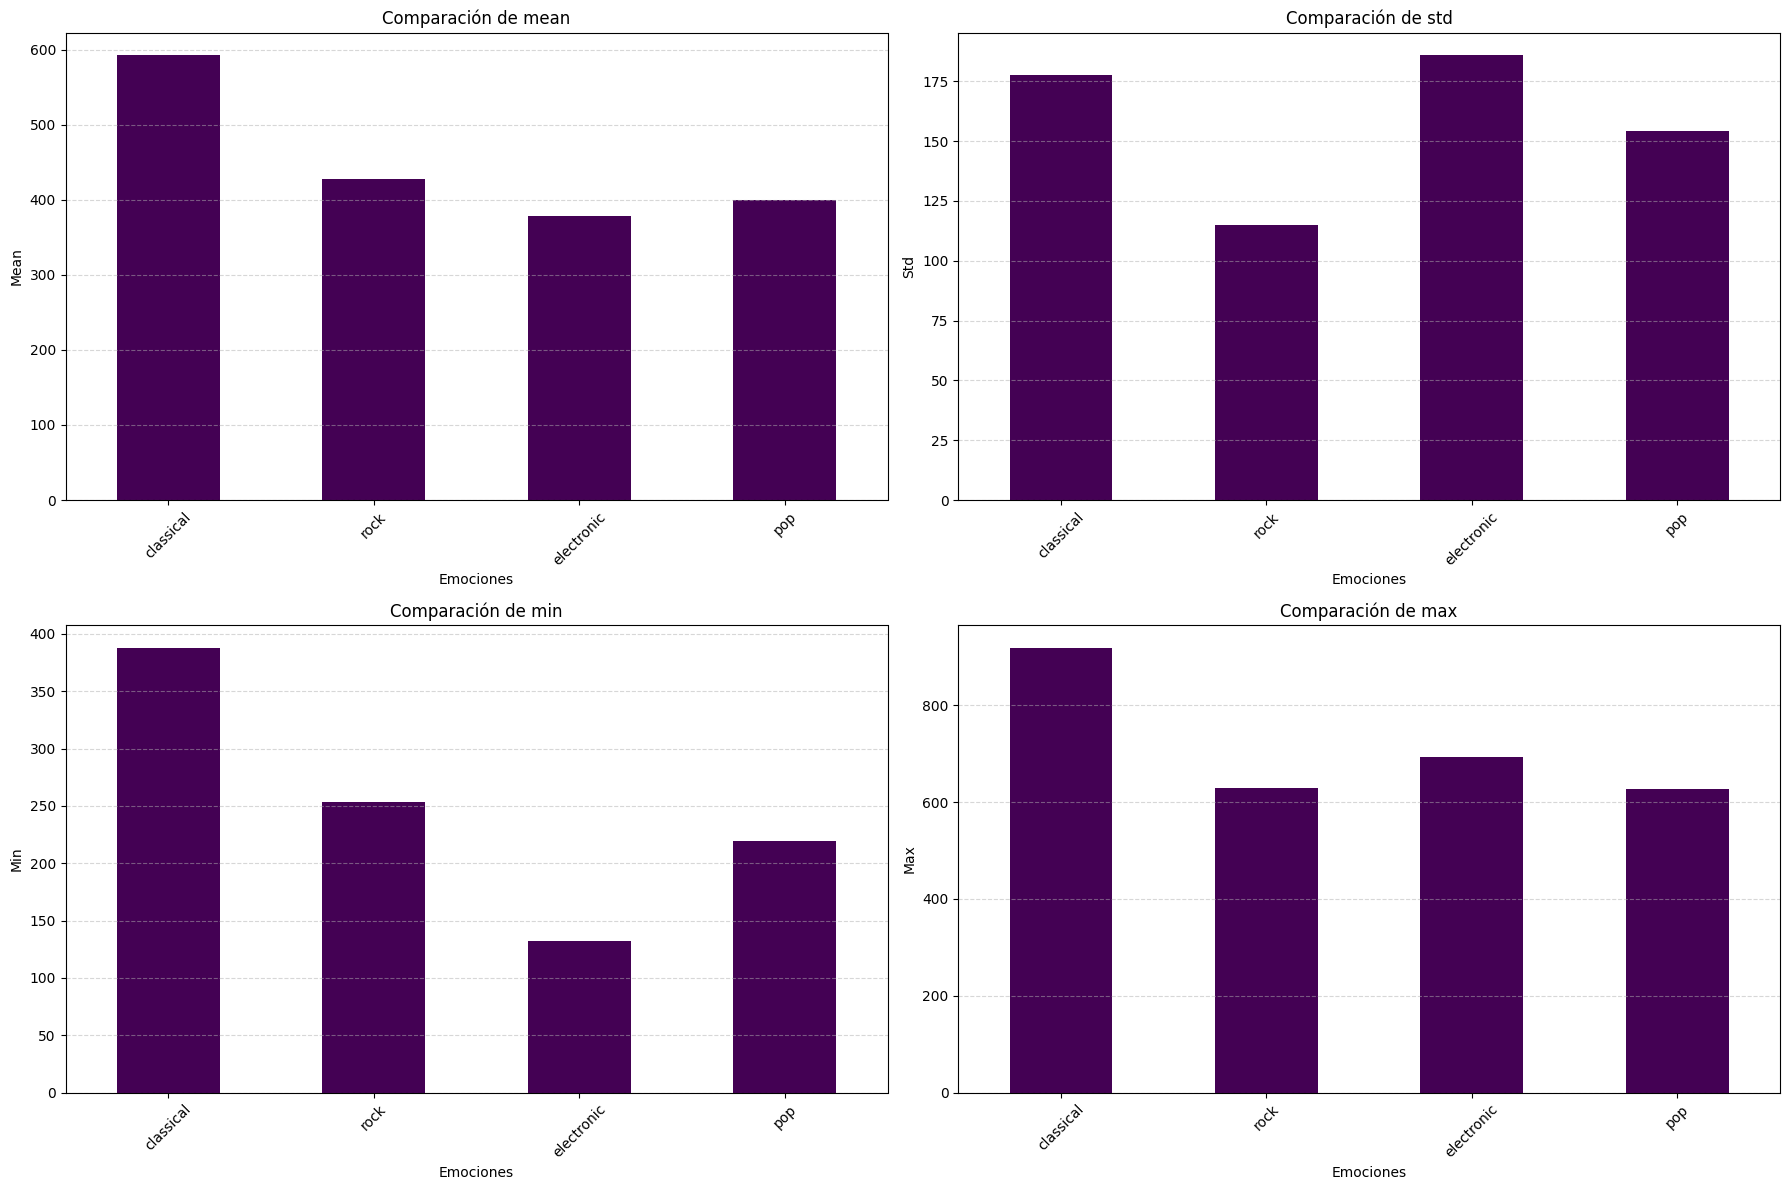

In [126]:
# Seleccionar las estadísticas principales que queremos visualizar
stats_variables = ["mean", "std", "min", "max"]

# Crear una figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Graficar cada estadística en un subplot diferente
for stat, ax in zip(stats_variables, axs.flat):
    graphs = stats_combined.loc[stat]
    
    # Crear un gráfico de barras agrupado
    graphs.plot(kind="bar", ax=ax, colormap="viridis")
    ax.set_title(f"Comparación de {stat}")
    ax.set_xlabel("Emociones")
    ax.set_ylabel(f"{stat.capitalize()}")
    ax.tick_params(axis="x", rotation=45)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()



In [96]:
classical_df

,trackid,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mothertongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,100,classical,0,0,0,0,0,1,0,1,0,3,1,0,30,0,Dutch
2684,100,classical,0,1,0,0,0,0,0,1,1,1,1,0,33,0,Russian
2685,100,classical,0,0,0,0,0,1,0,0,1,4,1,0,23,1,English
2686,100,classical,1,1,0,0,0,1,0,0,0,3,0,0,22,0,Malay


In [97]:
classical_mood = classical_df["mood"].value_counts()
classical_mood


mood
4    991
3    933
5    469
2    187
1    108
Name: count, dtype: int64

In [98]:
rock_mood = rock_df["mood"].value_counts()
rock_mood

mood
4    787
3    701
5    251
2    247
1     52
Name: count, dtype: int64

In [99]:
electronic_mood = electronic_df["mood"].value_counts()
electronic_mood

mood
4    774
3    568
5    231
2    168
1     85
Name: count, dtype: int64

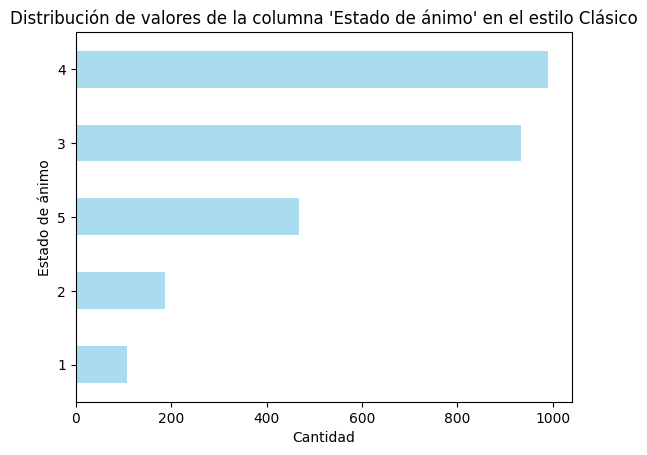

In [127]:
classical_mood.plot(kind="barh", color="skyblue", linestyle="--", alpha=0.7)
plt.title("Distribución de valores de la columna 'Estado de ánimo' en el estilo Clásico")
plt.ylabel("Estado de ánimo")
plt.xlabel("Cantidad");
plt.gca().invert_yaxis()


In [128]:
emotions["mood"].value_counts(ascending=False)

mood
4    3239
3    2776
5    1216
2     833
1     343
Name: count, dtype: int64

In [130]:
classical_df["mood"].unique()

array([3, 4, 2, 5, 1])

In [131]:

genres = ["classical", "rock", "electronic", "pop"]
columns_emotions = ["mood"]

# Crear un dataframe para almacenar los valores de 'mood' para cada género
mood_data = pd.DataFrame()

for genre in genres:
    # Filtrar el dataframe por género y contar los valores de 'mood'
    genre_df = emotions[emotions["genre"] == genre]["mood"].value_counts().sort_index()
    mood_data[genre] = genre_df

mood_data


,classical,rock,electronic,pop
mood,,,,
1,108,52,85,98
2,187,247,168,231
3,933,701,568,574
4,991,787,774,687
5,469,251,231,265


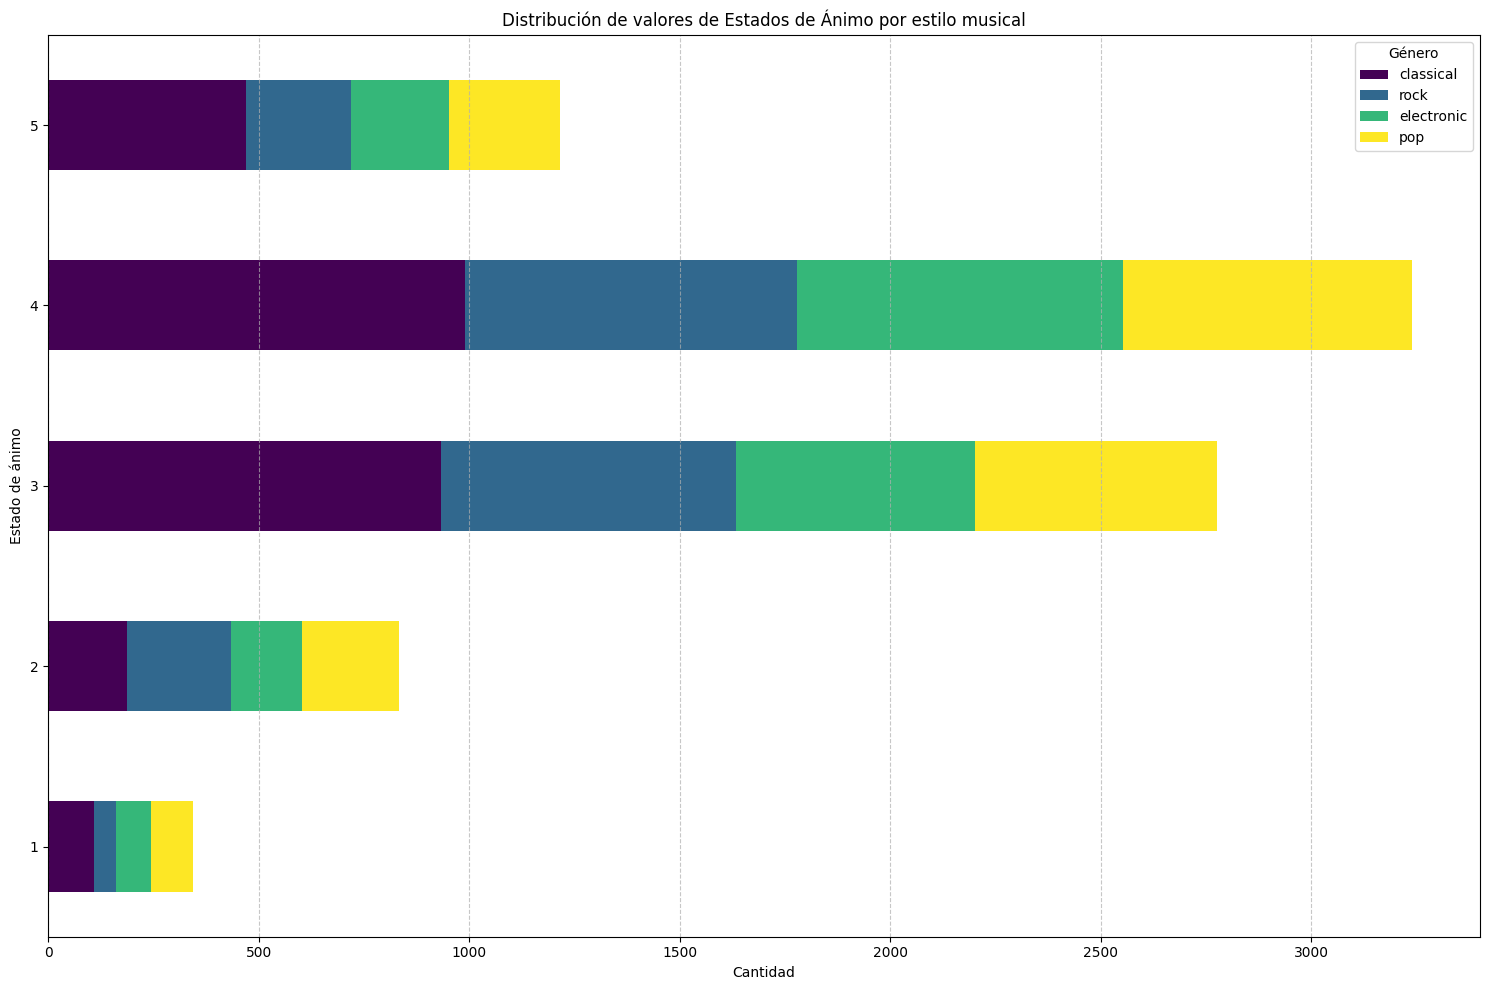

In [134]:
mood_data.plot(kind="barh", stacked=True, figsize=(15, 10), colormap="viridis")

plt.title("Distribución de valores de Estados de Ánimo por estilo musical")
plt.ylabel("Estado de ánimo")
plt.xlabel("Cantidad")
plt.legend(title="Género", loc="upper right")
plt.xticks()
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout();

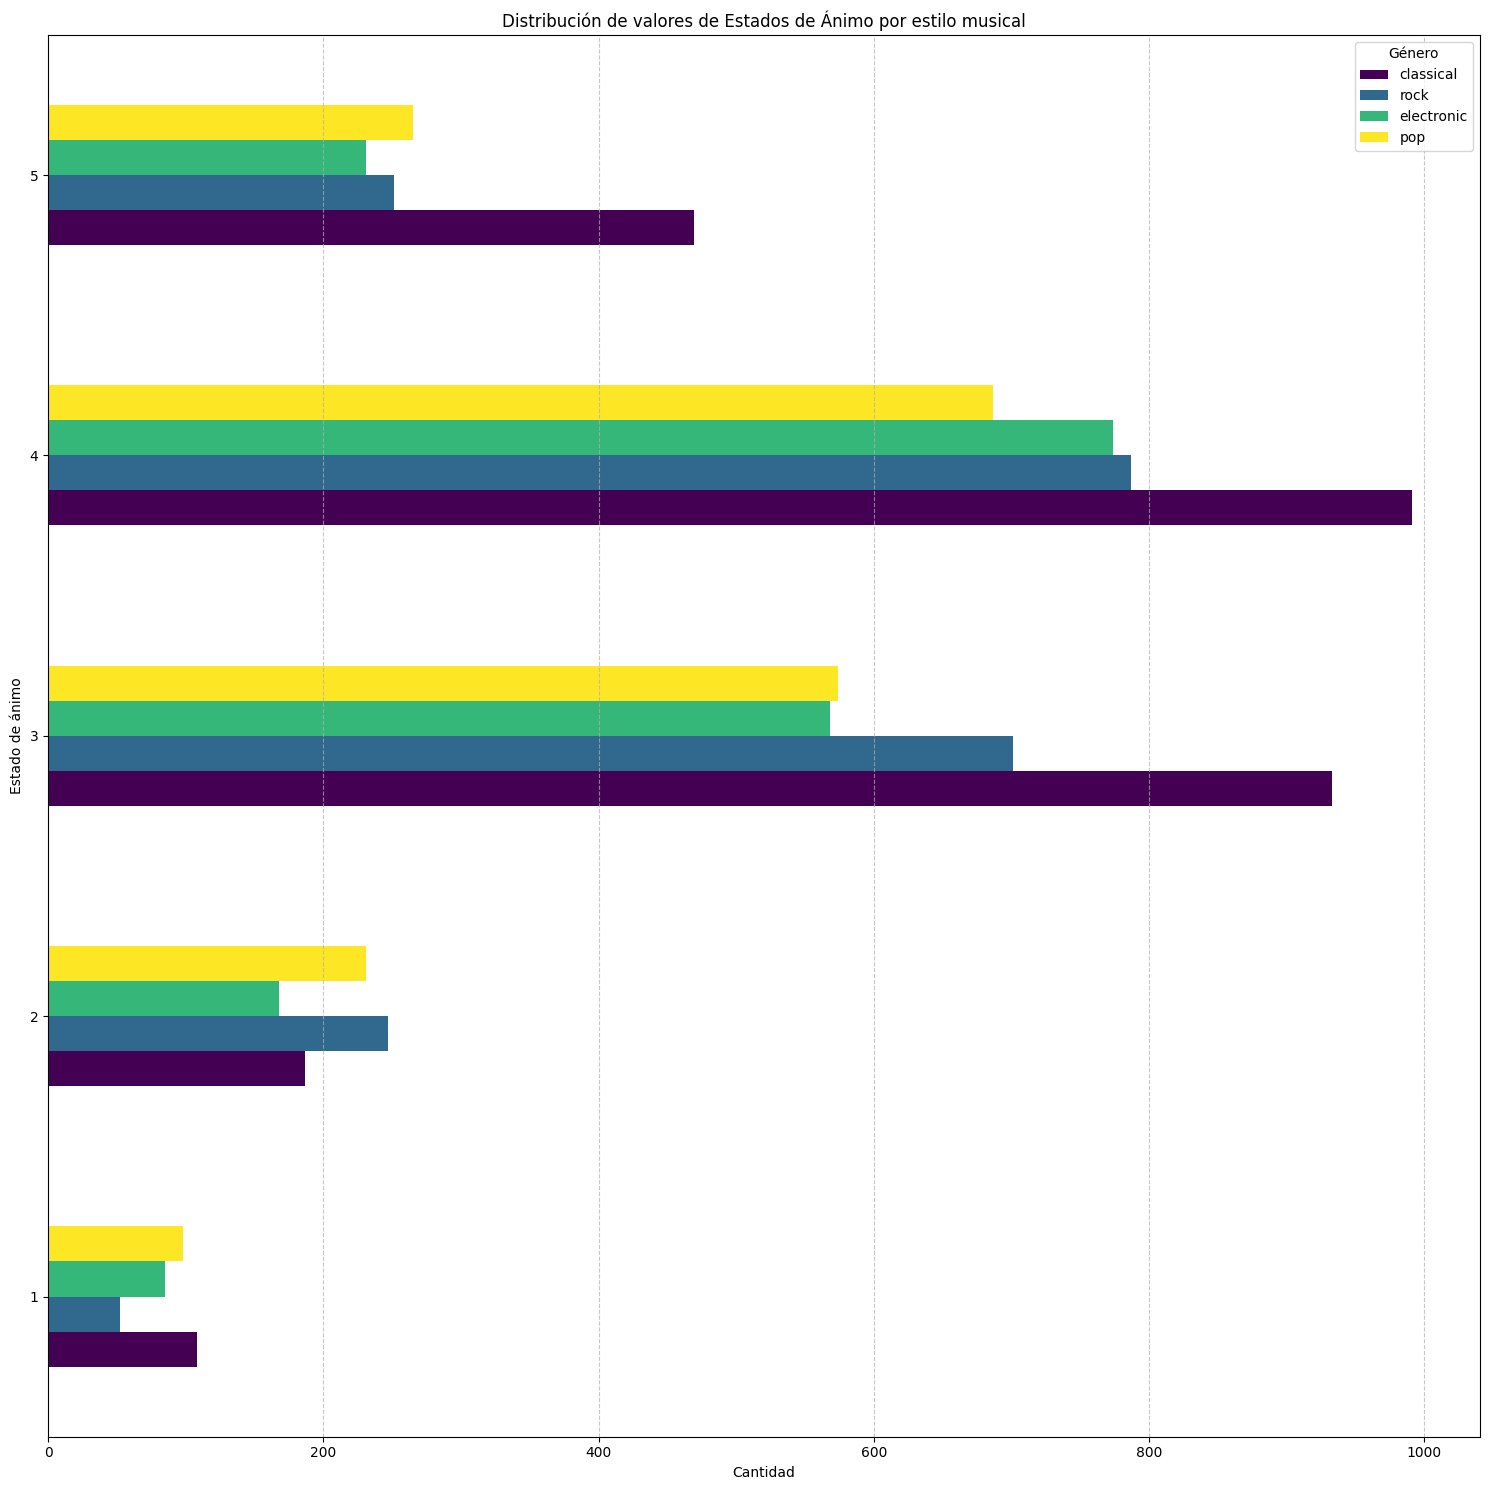

In [137]:

mood_data.plot(kind="barh", figsize=(15, 15), colormap="viridis")
plt.title("Distribución de valores de Estados de Ánimo por estilo musical")
plt.ylabel("Estado de ánimo")
plt.xlabel("Cantidad")
plt.legend(title="Género", loc="upper right")
plt.xticks()
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout();

In [138]:
emotions["age"].describe()

count    8407.000000
mean       31.850601
std        12.457801
min         5.000000
25%        23.000000
50%        28.000000
75%        37.000000
max        99.000000
Name: age, dtype: float64

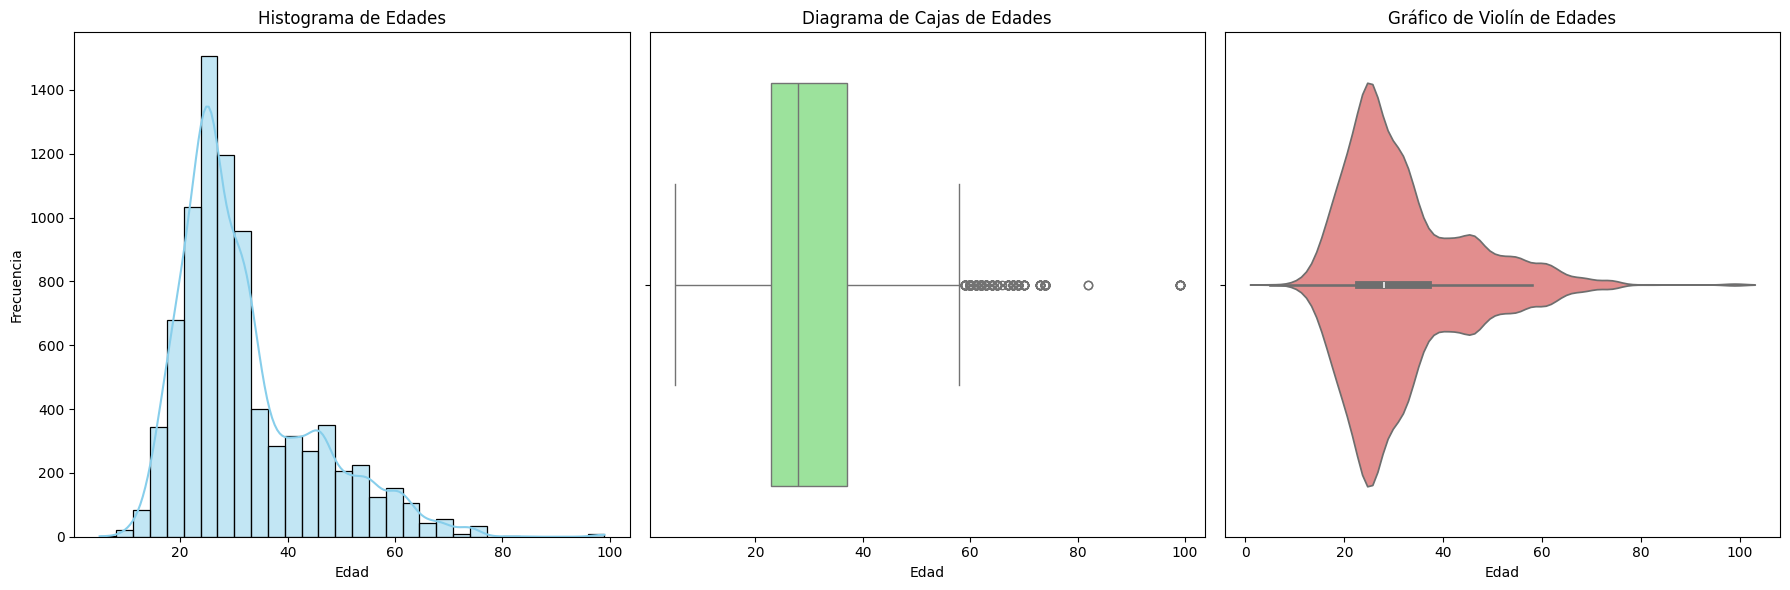

In [141]:

# Extraer la columna "Age"
age_data = emotions["age"]

# Crear una visualización con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1. Histograma
sns.histplot(age_data, bins=30, kde=True, color="skyblue", ax=axs[0])
axs[0].set_title("Histograma de Edades")
axs[0].set_xlabel("Edad")
axs[0].set_ylabel('Frecuencia')

# 2. Diagrama de Cajas (Box Plot)
sns.boxplot(x=age_data, color="lightgreen", ax=axs[1])
axs[1].set_title("Diagrama de Cajas de Edades")
axs[1].set_xlabel("Edad")

# 3. Gráfico de Violín (Violin Plot)
sns.violinplot(x=age_data, color="lightcoral", ax=axs[2])
axs[2].set_title("Gráfico de Violín de Edades")
axs[2].set_xlabel("Edad")

plt.tight_layout()




In [143]:
emotions["gender"].value_counts()

# Hay 4572 muejres por 3835 hombres

gender
0    4572
1    3835
Name: count, dtype: int64

In [145]:

# Agrupamos por 'genre' y'gender'
agrupacion_sexo_por_estilo = emotions.groupby('genre')['gender'].value_counts().unstack()

agrupacion_sexo_por_estilo


gender,0,1
genre,,
classical,1491,1197
electronic,1099,727
pop,854,1001
rock,1128,910


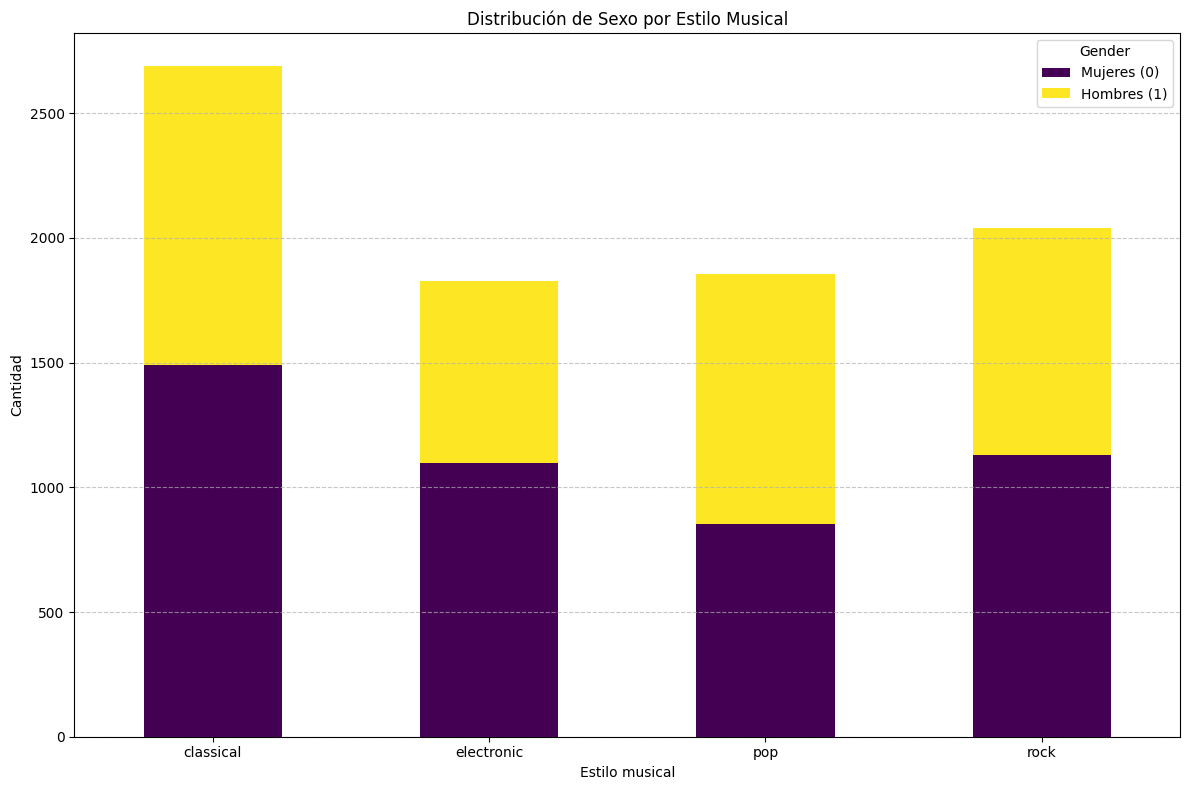

In [149]:
# Gráfico de barras apiladas
agrupacion_sexo_por_estilo.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="viridis")

plt.title("Distribución de Sexo por Estilo Musical")
plt.xlabel("Estilo musical")
plt.ylabel("Cantidad")
plt.legend(title="Gender", labels=["Mujeres (0)", "Hombres (1)"])
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()


In [ ]:
# Agrupar por 'estilo' y 'sexo' y sacar los estadísticos de la edad
grouped_by_genre_gender = emotions.groupby(["genre", "gender"])["age"].describe()

grouped_by_genre_gender 


count       mean        std   min   25%   50%   75%   max
genre      gender                                                            
classical  0       1491.0  35.606304  13.523579  14.0  25.0  33.0  44.5  82.0
           1       1197.0  33.570593  13.203934  11.0  25.0  29.0  42.0  70.0
electronic 0       1099.0  31.748863  11.619526  11.0  23.0  30.0  37.0  68.0
           1        727.0  26.506190   7.807403  10.0  22.0  25.0  29.0  61.0
pop        0        854.0  32.172131  13.394269  14.0  23.0  29.0  37.0  99.0
           1       1001.0  29.259740  10.561177   5.0  23.0  26.0  34.0  69.0
rock       0       1128.0  32.732270  13.365291   5.0  23.0  30.0  38.0  74.0
           1        910.0  29.282418  10.806042  11.0  23.0  26.0  32.0  61.0

In [166]:
"""
# Correlación entre 'edad' y 'sexo' en cada 'estilo'
correlations = emotions.groupby("genre").apply(lambda x: x["age"].corr(x["gender"]))

correlations
"""

C:\Users\aguir\AppData\Local\Temp\ipykernel_14284\3974565932.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = emotions.groupby("genre").apply(lambda x: x["age"].corr(x["gender"]))


genre
classical    -0.075417
electronic   -0.242491
pop          -0.120661
rock         -0.138288
dtype: float64

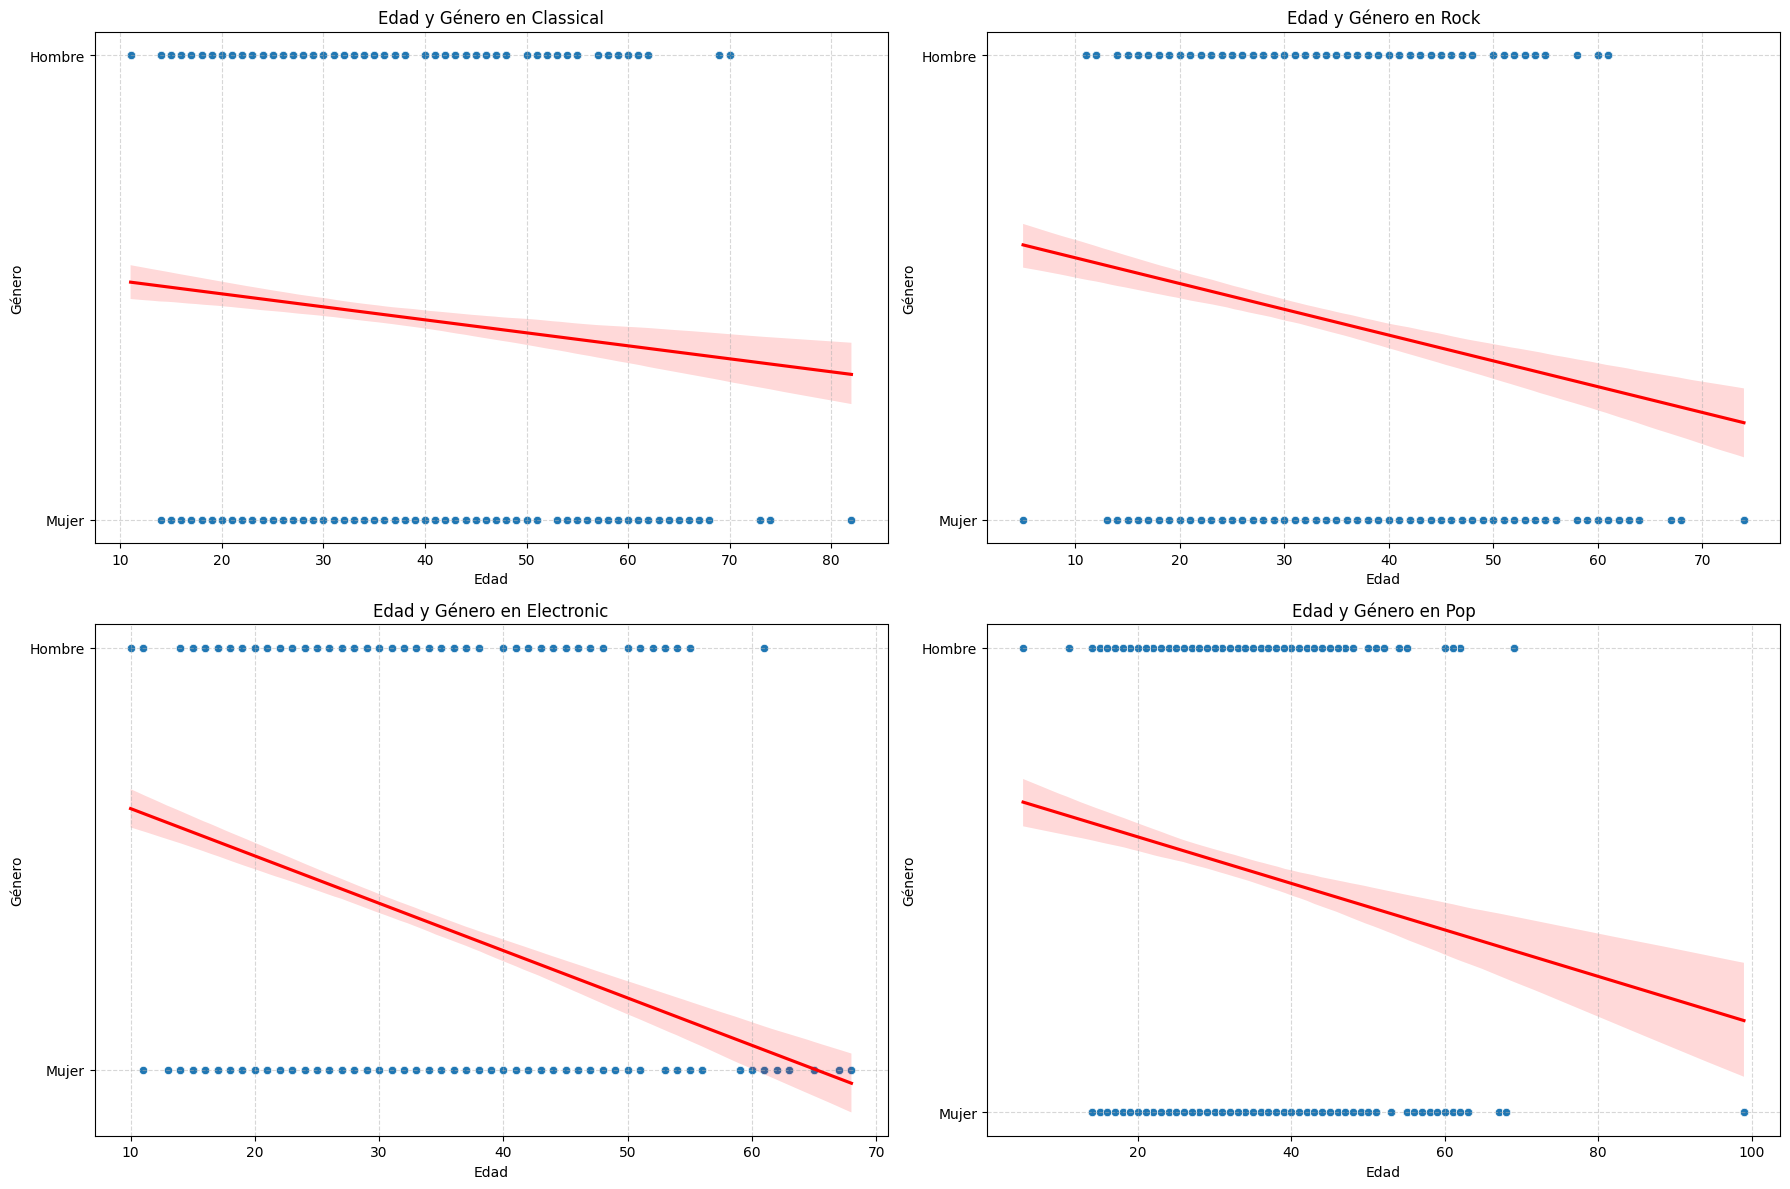

In [167]:
"""
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

genres = ["classical", "rock", "electronic", "pop"]

# Graficar cada género en un subplot diferente
for ax, genre in zip(axs.flat, genres):
    sns.scatterplot(data=emotions[emotions["genre"] == genre], x="age", y="gender", ax=ax)
    sns.regplot(data=emotions[emotions["genre"] == genre], x="age", y="gender", ax=ax, scatter=False, color="r")
    ax.set_title(f"Edad y Género en {genre.capitalize()}")
    ax.set_xlabel("Edad")
    ax.set_ylabel("Género")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Mujer", "Hombre"])
    ax.grid(axis="both", linestyle="--", alpha=0.5)

plt.tight_layout()
"""


In [168]:
"""
# Agrupar los datos por 'estilo', 'sexo' y 'edad' y contar los registros
grouped_data = emotions.groupby(["genre", "gender", "age"]).size().reset_index(name="counts")

grouped_data
"""

,genre,gender,age,counts
0,classical,0,14,1
1,classical,0,15,8
2,classical,0,16,5
3,classical,0,17,12
4,classical,0,18,65
...,...,...,...,...
394,rock,1,54,4
395,rock,1,55,11
396,rock,1,58,1
397,rock,1,60,23


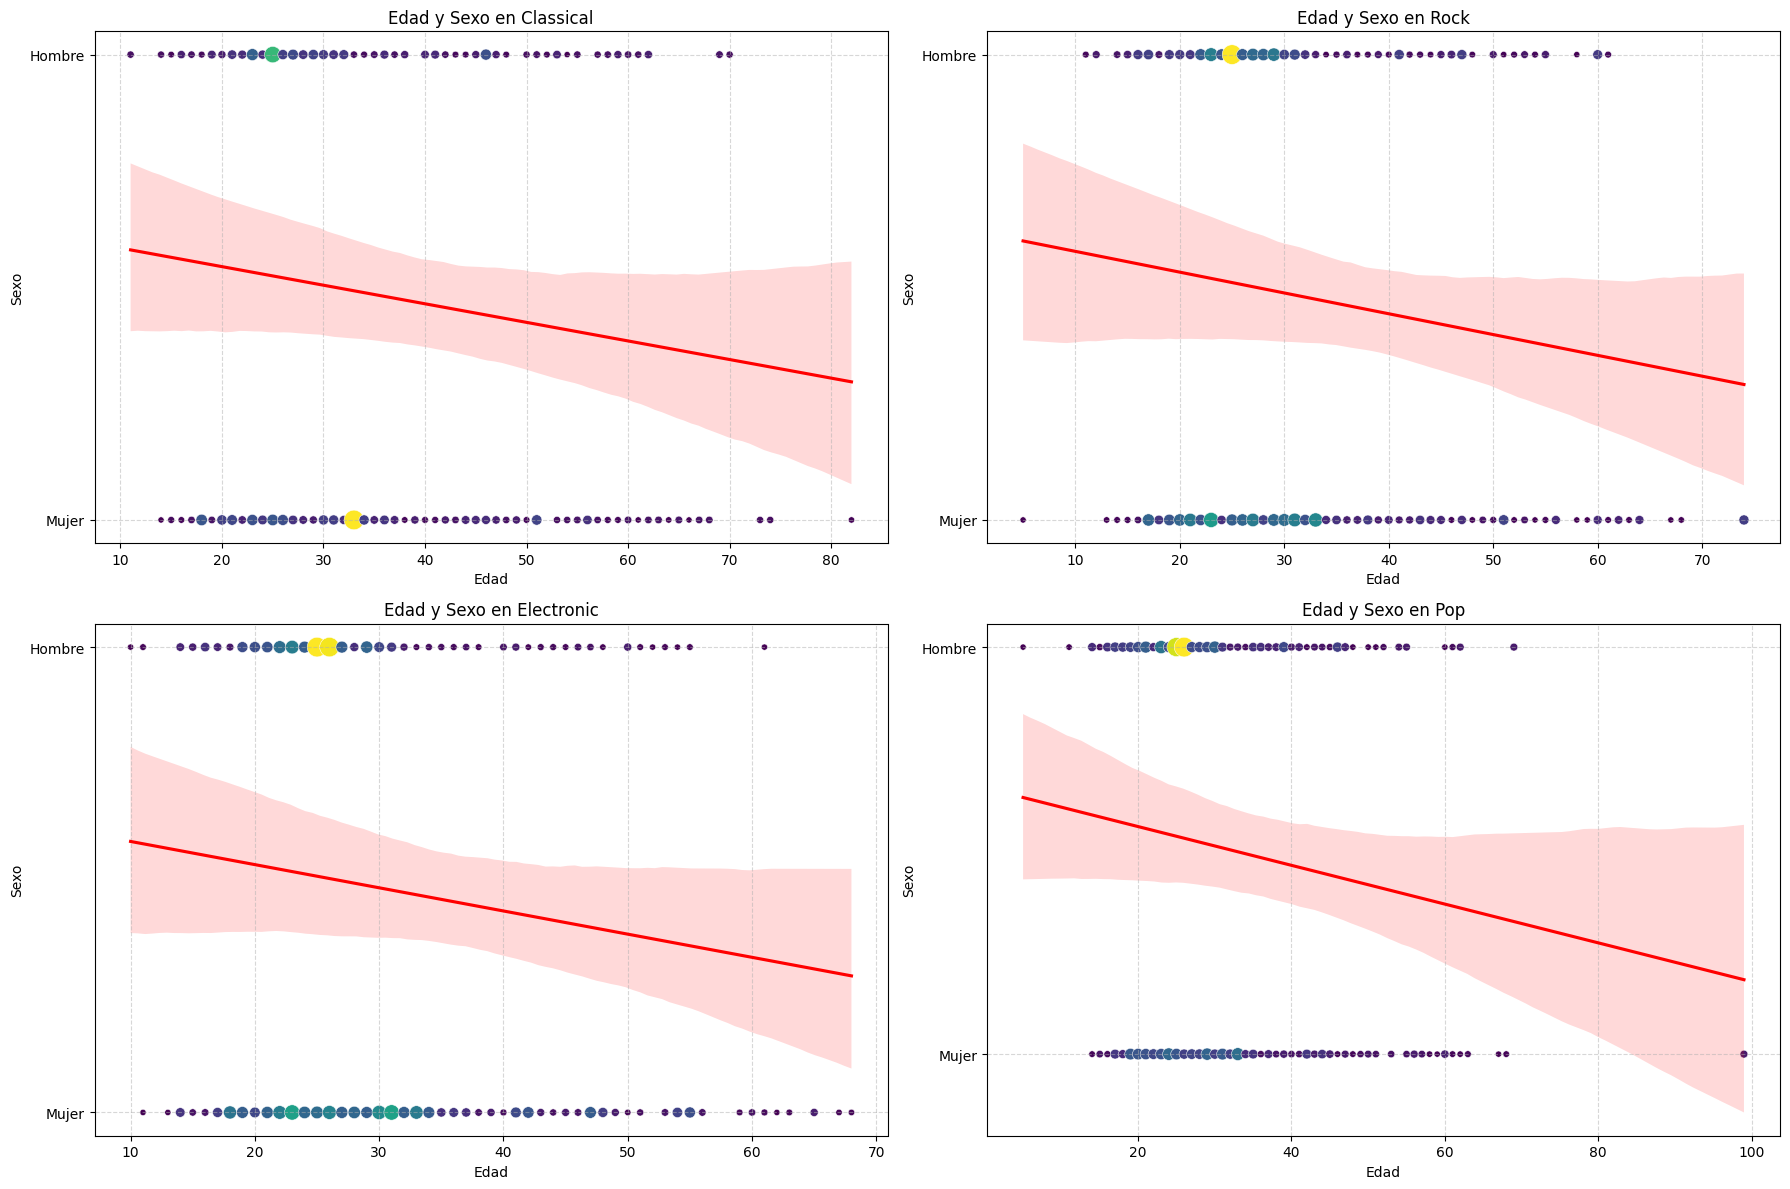

In [169]:
"""
genres = ["classical", "rock", "electronic", "pop"]

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for ax, genre in zip(axs.flat, genres):
    genre_data = grouped_data[grouped_data["genre"] == genre]
    sns.scatterplot(data=genre_data, x="age", y="gender", size="counts", ax=ax, legend=False, sizes=(20, 200), hue="counts", palette="viridis")
    sns.regplot(data=genre_data, x="age", y="gender", ax=ax, scatter=False, color="r")
    ax.set_title(f"Edad y Sexo en {genre.capitalize()}")
    ax.set_xlabel("Edad")
    ax.set_ylabel("Sexo")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Mujer", "Hombre"])
    ax.grid(axis="both", linestyle="--", alpha=0.5)

plt.tight_layout()
"""


In [181]:
emotions.groupby("genre")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
classical,2688.0,34.699777,13.417916,11.0,25.0,32.0,44.0,82.0
electronic,1826.0,29.661555,10.586237,10.0,23.0,26.0,33.0,68.0
pop,1855.0,30.600539,12.033776,5.0,23.0,27.0,35.0,99.0
rock,2038.0,31.191855,12.404886,5.0,23.0,28.0,36.0,74.0


C:\Users\aguir\AppData\Local\Temp\ipykernel_14284\2856234620.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="age", data=emotions, palette=palette)


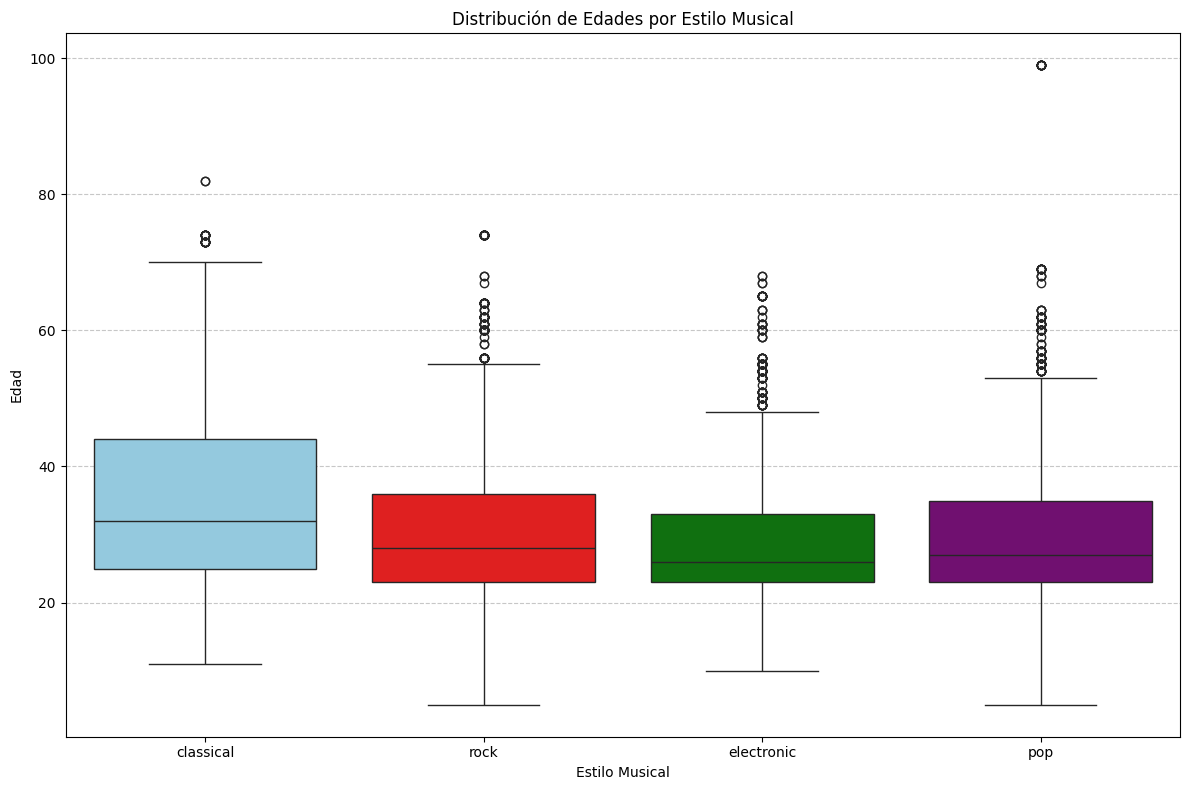

In [174]:

palette = {"electronic": "green",
           "classical": "skyblue",
           "pop": "purple",
           "rock": "red"}

plt.figure(figsize=(12, 8))

# Diagrama de cajas
sns.boxplot(x="genre", y="age", data=emotions, palette=palette)
plt.title("Distribución de Edades por Estilo Musical")
plt.xlabel("Estilo Musical")
plt.ylabel("Edad")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()



C:\Users\aguir\AppData\Local\Temp\ipykernel_14284\3316072356.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="genre", y="age", data=emotions, palette=palette)


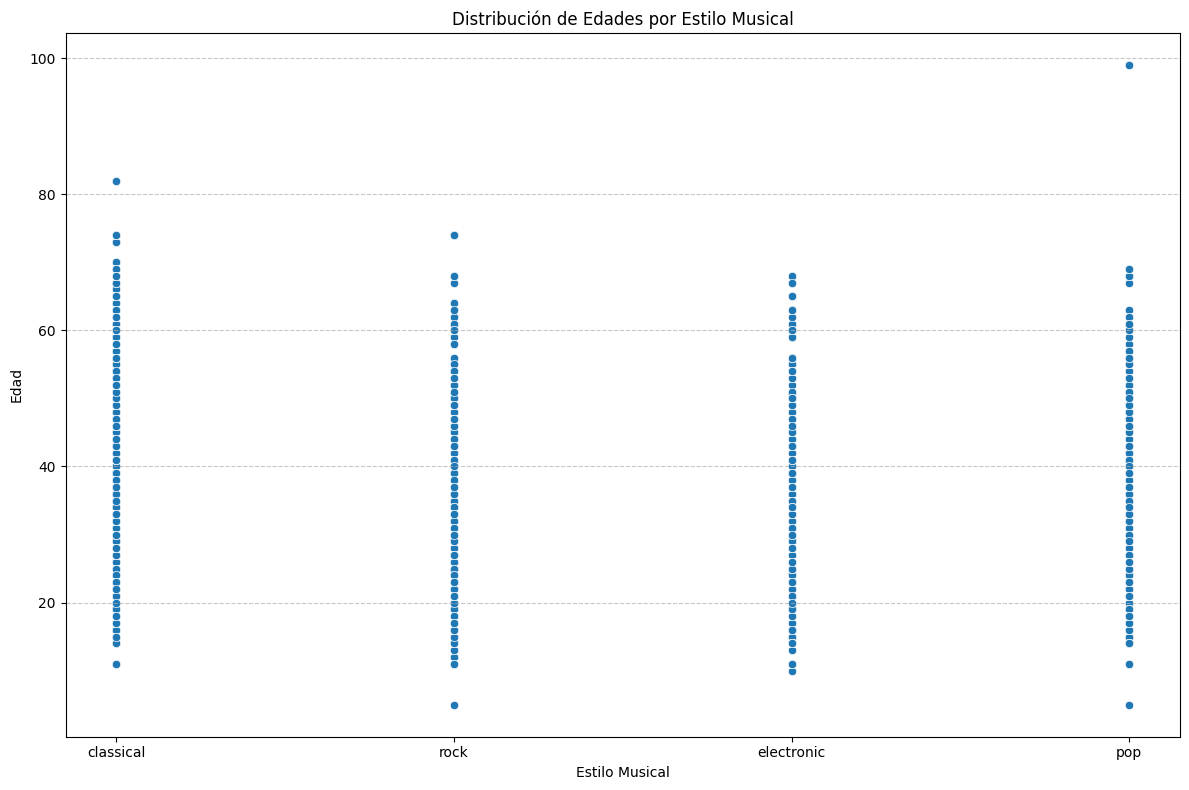

In [176]:
"""
palette = {"electronic": "green",
           "classical": "skyblue",
           "pop": "purple",
           "rock": "red"}

plt.figure(figsize=(12, 8))

# Diagrama de cajas
sns.scatterplot(x="genre", y="age", data=emotions, palette=palette)
plt.title("Distribución de Edades por Estilo Musical")
plt.xlabel("Estilo Musical")
plt.ylabel("Edad")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
"""


In [172]:
"""
# Agrupar los datos por 'estilo y 'edad' y contar los registros
grouped_data = emotions.groupby(["genre", "age"]).size().reset_index(name="counts")

grouped_data
"""


,genre,age,counts
0,classical,11,11
1,classical,14,11
2,classical,15,13
3,classical,16,26
4,classical,17,24
...,...,...,...
223,rock,63,3
224,rock,64,17
225,rock,67,1
226,rock,68,2


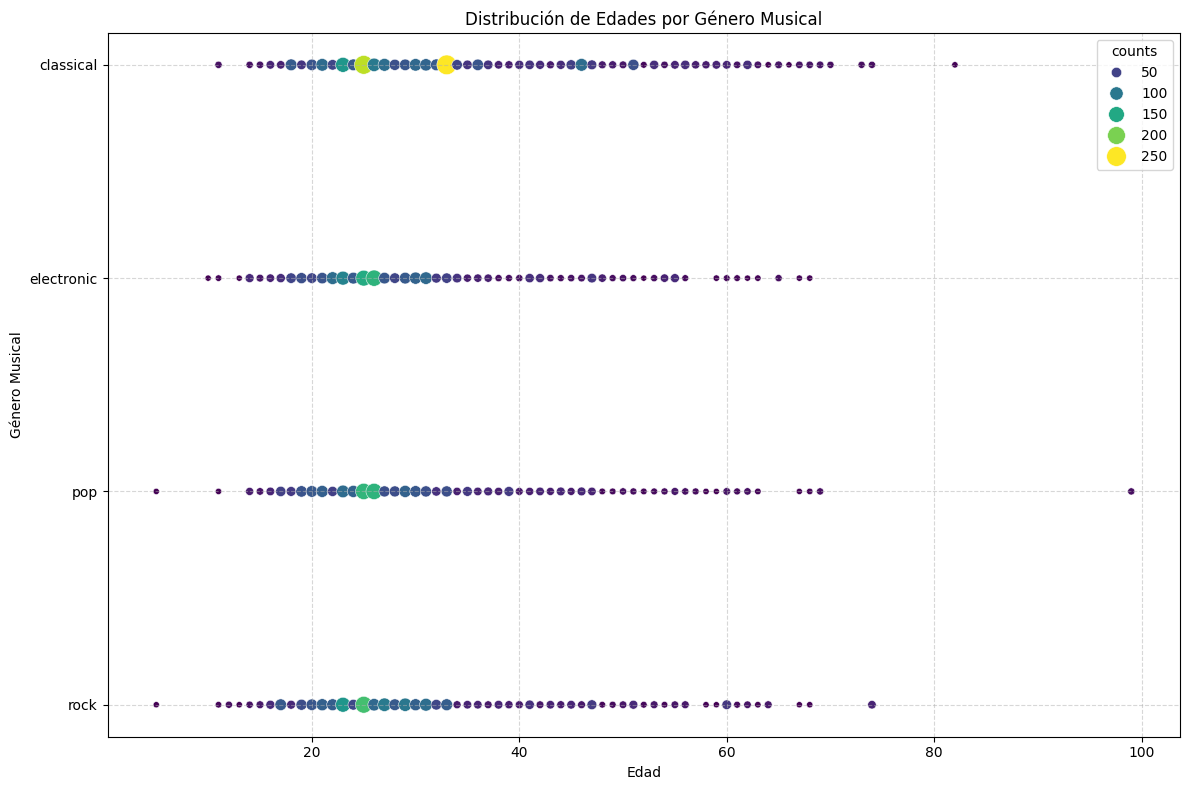

In [182]:
"""
plt.figure(figsize=(12, 8))

# Gráfico de dispersión (scatter plot)
sns.scatterplot(data=grouped_data, x="age", y="genre", size="counts", hue="counts", palette="viridis", sizes=(20, 200))
plt.title("Distribución de Edades por Estilo Musical")
plt.xlabel("Edad")
plt.ylabel("Estilo Musical")
plt.grid(axis="both", linestyle="--", alpha=0.5)

plt.tight_layout()
"""


### 4. CONFIRMACIÓN/DESESTIMACIÓN DE LAS HIPÓTESIS

#### Hipótesis Principal: ¿QUÉ EMOCIONES NOS GENERA LA MÚSICA?

¿Podríamos decir que la música rock genera un sentimiento de exaltación de la alegría o más energía/fuerza?


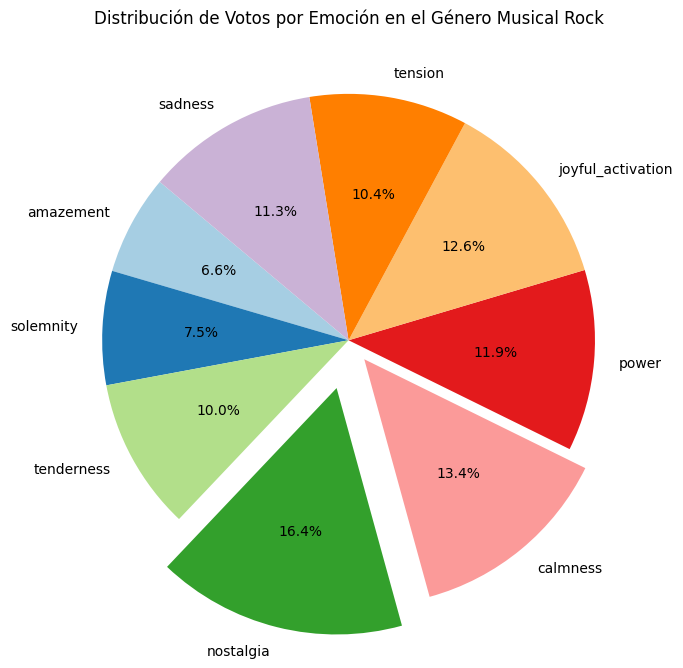

In [180]:
rock_emotions.plot.pie(autopct="%1.1f%%", startangle=140, figsize=(8, 8), colors=plt.cm.Paired.colors, explode = (0,0,0,0.2,0.1,0,0,0,0))
plt.title("Distribución de Votos por Emoción en el Género Musical Rock")
plt.ylabel(" ")
plt.show()

#### Hipótesis 2: EL GÉNERO MUSICAL DE UN EVENTO INFLUYE EN LA EDAD DE LOS ASISTENTES

- ¿Podríamos decir que a un evento de música electrónica acude generalmente un público más joven? 
- ¿Y en el resto de estilos musicales? 
- ¿El tipo de persona que escucha rock, tendrá una de edad superior a la media?

In [182]:
emotions.groupby("genre")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
classical,2688.0,34.699777,13.417916,11.0,25.0,32.0,44.0,82.0
electronic,1826.0,29.661555,10.586237,10.0,23.0,26.0,33.0,68.0
pop,1855.0,30.600539,12.033776,5.0,23.0,27.0,35.0,99.0
rock,2038.0,31.191855,12.404886,5.0,23.0,28.0,36.0,74.0
